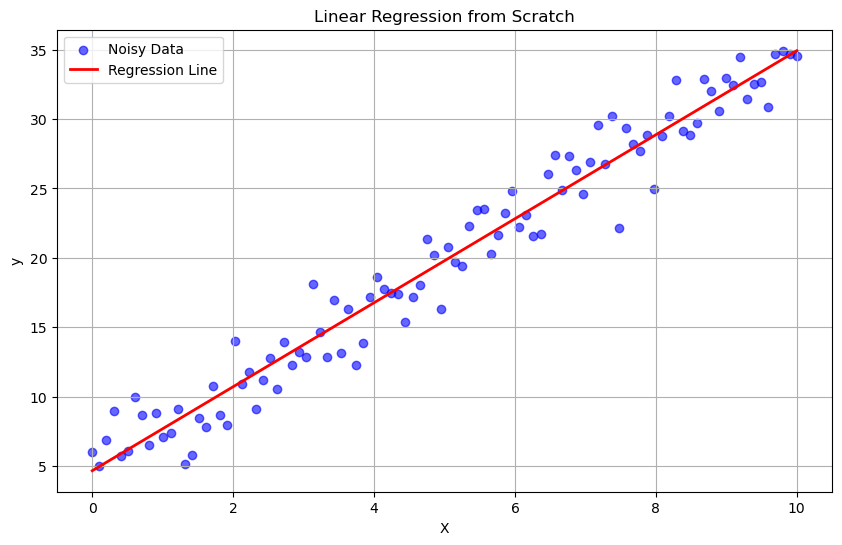

Intercept: 4.65
Coefficient: 3.03


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)  # For reproducibility
X = np.linspace(0, 10, 100)  # Feature: 100 points between 0 and 10
y = 3 * X + 5 + np.random.normal(0, 2, 100)  # Linear trend with noise

# Add a column of ones to X to account for the intercept (bias term)
X_matrix = np.c_[np.ones(X.shape[0]), X]  # Shape (100, 2), first column is all 1s for the intercept

# Compute the optimal theta using the normal equation: theta = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ y)

# Predicted values
y_pred = X_matrix @ theta

# Plot the noisy data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Noisy Data', alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression from Scratch')
plt.legend()
plt.grid(True)
plt.show()

# Print model parameters
print(f"Intercept: {theta[0]:.2f}")
print(f"Coefficient: {theta[1]:.2f}")

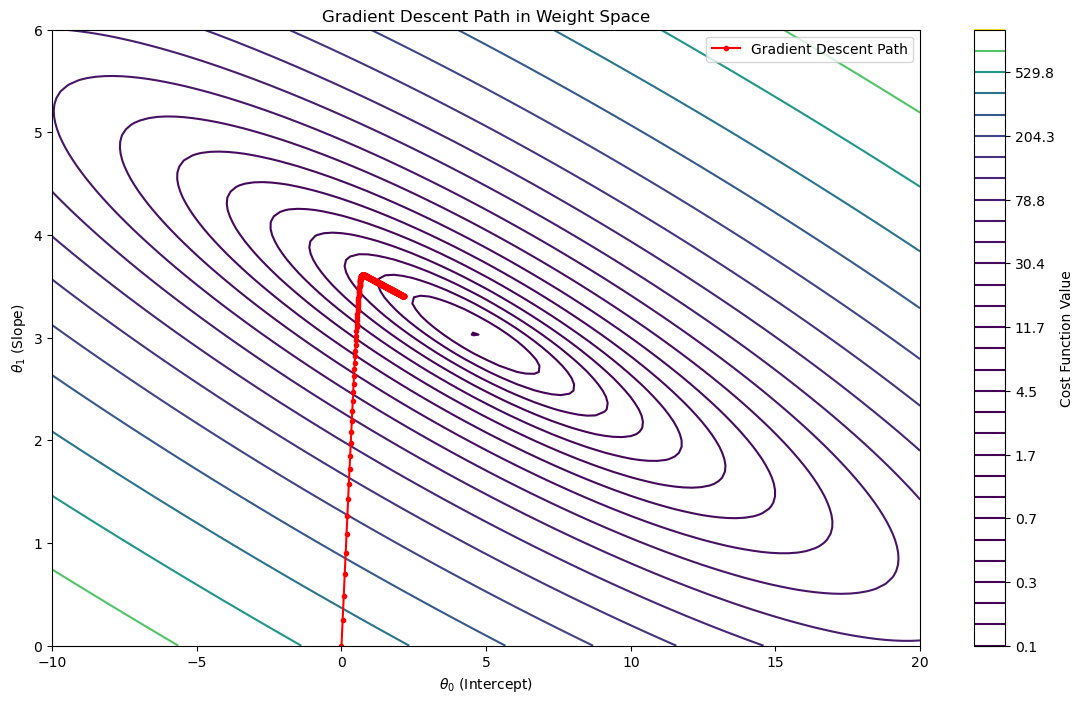

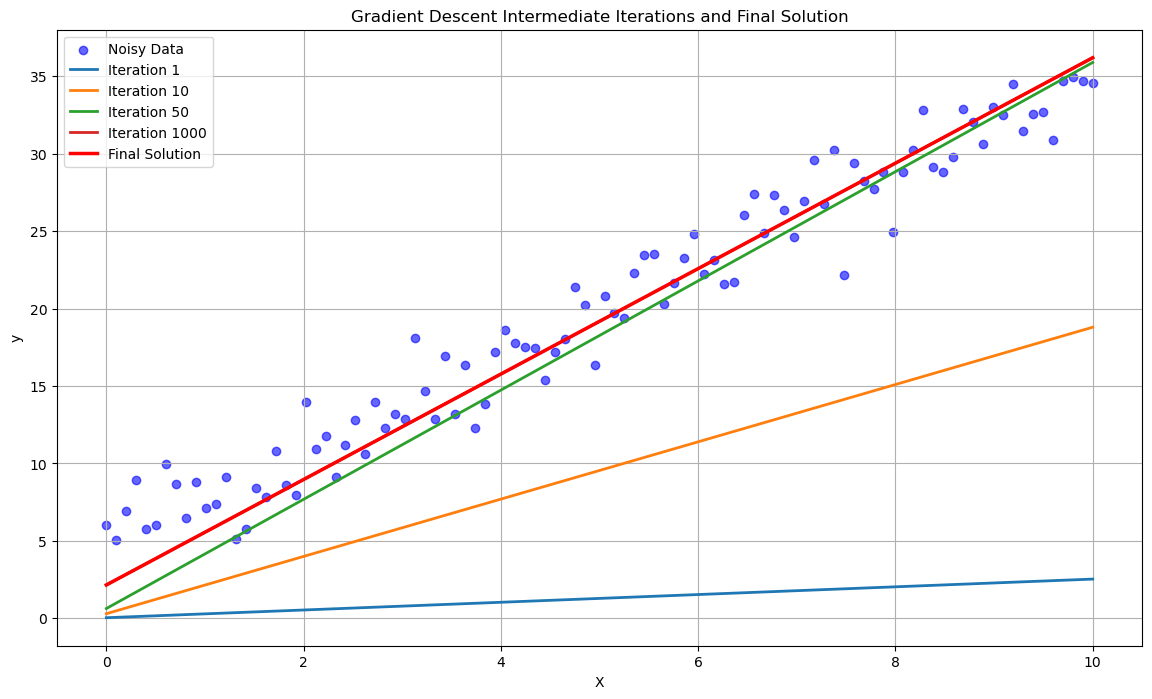

Final intercept: 2.16
Final slope: 3.40


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3 * X + 5 + np.random.normal(0, 2, 100)

# Prepare the data matrix (with intercept)
X_matrix = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
theta = np.array([0.0, 0.0])  # Starting point (initial guess)
learning_rate = 0.001
iterations = 1000
m = len(y)

# Cost function history for visualization
cost_history = []
theta_history = [theta]

# Gradient descent algorithm
for i in range(iterations):
    # Calculate the gradient
    gradient = (-2/m) * (X_matrix.T @ (y - (X_matrix @ theta)))
    
    # Update theta using gradient descent
    theta = theta - learning_rate * gradient
    theta_history.append(theta)
    
    # Calculate the cost (mean squared error)
    cost = (1/m) * np.sum((y - (X_matrix @ theta))**2)
    cost_history.append(cost)

# Prepare weight space for visualization
theta_history = np.array(theta_history)
theta0_range = np.linspace(-10, 20, 100)
theta1_range = np.linspace(0, 6, 100)
T0, T1 = np.meshgrid(theta0_range, theta1_range)

# Compute the cost function for weight space visualization
J = np.zeros(T0.shape)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        theta_temp = np.array([T0[i, j], T1[i, j]])
        J[i, j] = (1/m) * np.sum((y - (X_matrix @ theta_temp))**2)

# Plot weight space with the path of gradient descent
plt.figure(figsize=(14, 8))
plt.contour(T0, T1, J, levels=np.logspace(-1, 3, 30), cmap='viridis')
plt.plot(theta_history[:, 0], theta_history[:, 1], 'r.-', label='Gradient Descent Path')
plt.xlabel(r'$\theta_0$ (Intercept)')
plt.ylabel(r'$\theta_1$ (Slope)')
plt.title('Gradient Descent Path in Weight Space')
plt.colorbar(label='Cost Function Value')
plt.legend()
plt.show()

# Plot intermediate iterations and the final solution on the data
iterations_to_plot = [1, 10, 50, iterations]  # Plot after these iterations
plt.figure(figsize=(14, 8))
plt.scatter(X, y, color='blue', label='Noisy Data', alpha=0.6)

for iter_idx in iterations_to_plot:
    theta_iter = theta_history[iter_idx]
    y_pred_iter = X_matrix @ theta_iter
    plt.plot(X, y_pred_iter, label=f'Iteration {iter_idx}', linewidth=2)

# Plot the final regression line
y_pred_final = X_matrix @ theta_history[-1]
plt.plot(X, y_pred_final, color='red', linewidth=2.5, label='Final Solution')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Intermediate Iterations and Final Solution')
plt.legend()
plt.grid(True)
plt.show()

# Print final theta values
final_theta = theta_history[-1]
print(f"Final intercept: {final_theta[0]:.2f}")
print(f"Final slope: {final_theta[1]:.2f}")